In [2]:
# importing necessary modules
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# selenium code solution from AI, not able to iterate through pages

# from selenium import webdriver
# from selenium.webdriver.common.by import By
# from selenium.webdriver.support.ui import WebDriverWait
# from selenium.webdriver.support import expected_conditions as EC
# import pandas as pd

# # URL of the webpage
# base_url = "https://www.fangraphs.com/roster-resource/injury-report?timeframe=all&season=2024&groupby=all&page="

# # Initialize the WebDriver
# driver = webdriver.Chrome()

# # List to store all rows
# all_rows = []

# # Loop through the pages
# for page in range(1, 7):  # Adjust the range as needed
#     # Open the webpage
#     driver.get(base_url + str(page))

#     # Wait for the div with class "table-wrapper-inner" to be present
#     wait = WebDriverWait(driver, 10)
#     div = wait.until(EC.presence_of_element_located((By.CLASS_NAME, "table-wrapper-inner")))

#     # Find the table within the div
#     table = div.find_element(By.TAG_NAME, 'table')

#     # Extract the headers (only once)
#     if page == 1:
#         headers = [header.text for header in table.find_elements(By.TAG_NAME, 'th')]

#     # Extract the rows
#     for row in table.find_elements(By.TAG_NAME, 'tr')[1:]:
#         cells = row.find_elements(By.TAG_NAME, 'td')
#         all_rows.append([cell.text for cell in cells])

# # Create a DataFrame
# df = pd.DataFrame(all_rows, columns=headers)

# # Save the DataFrame to a CSV file
# df.to_csv('injury_report_24_v1.csv', index=False)

# print("Injury report saved to injury_report_24.csv")

# # Close the WebDriver
# driver.quit()


In [4]:
# generateing visualizations compareing injuries and stats

In [6]:
# 2020 stats
# Load the CSV files
injuries_df = pd.read_csv('Injury_Stats/injury_report_20_v2.csv')
stats_df = pd.read_csv('Stats/batting2020.csv')

# Merge the DataFrames on the player name
merged_df = pd.merge(injuries_df, stats_df, on='Name')

# Group by injury type and calculate average hitting stats
grouped_df = merged_df.groupby('Injury / Surgery').mean()

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Example: Plotting average batting average for each injury type
grouped_df['Batting Average'].plot(kind='bar', ax=ax)

# Customize the plot
ax.set_title('Average Batting Average by Injury Type')
ax.set_xlabel('Injury Type')
ax.set_ylabel('Average Batting Average')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


TypeError: agg function failed [how->mean,dtype->object]

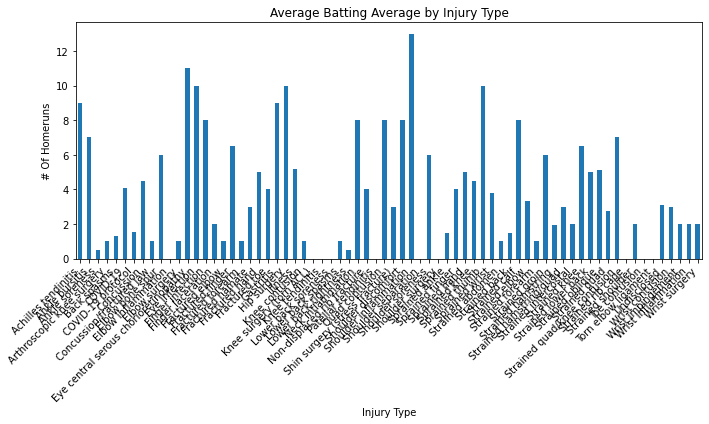

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
injuries_df = pd.read_csv('Injury_Stats/injury_report_20_v2.csv')
stats_df = pd.read_csv('Stats/batting2020.csv')
# Merge the DataFrames on the player name
merged_df = pd.merge(injuries_df, stats_df, on='Name')

# Select only numeric columns for aggregation
numeric_cols = merged_df.select_dtypes(include='number').columns
grouped_df = merged_df.groupby('Injury / Surgery')[numeric_cols].mean()

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Example: Plotting average batting average for each injury type
grouped_df['HR'].plot(kind='bar', ax=ax)

# 
plt.xticks(rotation=45, ha='right')

# Customize the plot
ax.set_title('Average Batting Average by Injury Type')
ax.set_xlabel('Injury Type')
ax.set_ylabel('# Of Homeruns')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
top_10_df = df.sort_values(by='Batting Average', ascending=False).head(10)

# Plotting the data
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot
ax.bar(top_10_df['Injury Type'], top_10_df['Batting Average'])

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Customize the plot
ax.set_title('Top 10 Average Batting Average by Injury Type')
ax.set_xlabel('Injury Type')
ax.set_ylabel('Average Batting Average')
plt.tight_layout()

# Show the plot
plt.show()

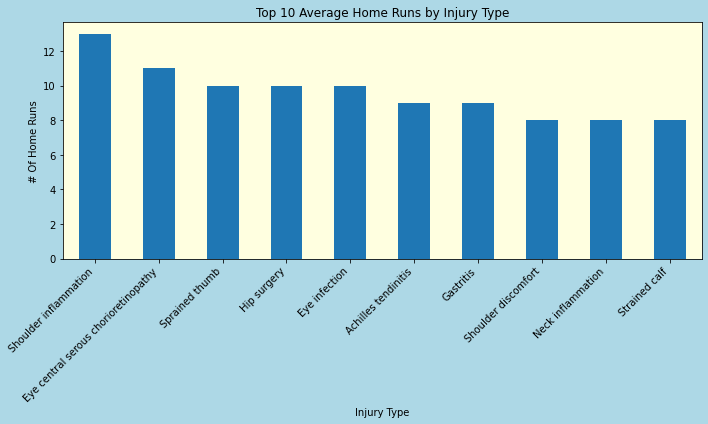

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
injuries_df = pd.read_csv('Injury_Stats/injury_report_20_v2.csv')
stats_df = pd.read_csv('Stats/batting2020.csv')

# Merge the DataFrames on the player name
merged_df = pd.merge(injuries_df, stats_df, on='Name')

# Select only numeric columns for aggregation
numeric_cols = merged_df.select_dtypes(include='number').columns
grouped_df = merged_df.groupby('Injury / Surgery')[numeric_cols].mean()

# Sort the DataFrame by the number of home runs (HR) in descending order and select the top 10
top_10_df = grouped_df.sort_values(by='HR', ascending=False).head(10)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color for the figure and axes
fig.patch.set_facecolor('lightblue')  # Background color for the figure
ax.set_facecolor('lightyellow')       # Background color for the axes

# Plotting the top 10 average home runs for each injury type
top_10_df['HR'].plot(kind='bar', ax=ax)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Customize the plot
ax.set_title('Top 15 Average Home Runs by Injury Type')
ax.set_xlabel('Injury Type')
ax.set_ylabel('# Of Home Runs')
plt.tight_layout()

# Show the plot
plt.show()


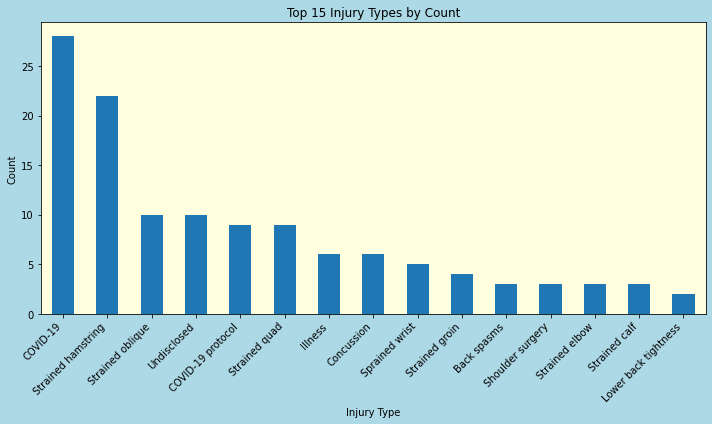

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
injuries_df = pd.read_csv('Injury_Stats/injury_report_20_v2.csv')
stats_df = pd.read_csv('Stats/batting2020.csv')

# Merge the DataFrames on the player name
merged_df = pd.merge(injuries_df, stats_df, on='Name')

# Count the occurrences of each injury type
injury_counts = merged_df['Injury / Surgery'].value_counts()

# Select the top 10 injury types
top_10_injuries = injury_counts.head(15)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color for the figure and axes
fig.patch.set_facecolor('lightblue')  # Background color for the figure
ax.set_facecolor('lightyellow')       # Background color for the axes

# Bar plot for the top 10 injury types by count
top_10_injuries.plot(kind='bar', ax=ax)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Customize the plot
ax.set_title('Top 15 Injury Types by Count')
ax.set_xlabel('Injury Type')
ax.set_ylabel('Count')
plt.tight_layout()

plt.savefig('Visuals/top_15_injury_types_20.png')

# Show the plot
plt.show()


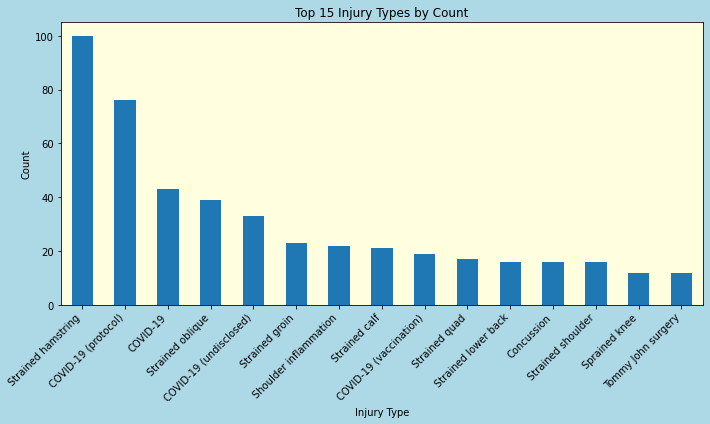

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
injuries_df = pd.read_csv('Injury_Stats/injury_report_21_v2.csv')
stats_df = pd.read_csv('Stats/batting2021.csv')

# Merge the DataFrames on the player name
merged_df = pd.merge(injuries_df, stats_df, on='Name')

# Count the occurrences of each injury type
injury_counts = merged_df['Injury / Surgery'].value_counts()

# Select the top 10 injury types
top_10_injuries = injury_counts.head(15)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color for the figure and axes
fig.patch.set_facecolor('lightblue')  # Background color for the figure
ax.set_facecolor('lightyellow')       # Background color for the axes

# Bar plot for the top 10 injury types by count
top_10_injuries.plot(kind='bar', ax=ax)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Customize the plot
ax.set_title('Top 15 Injury Types by Count')
ax.set_xlabel('Injury Type')
ax.set_ylabel('Count')
plt.tight_layout()

plt.savefig('Visuals/top_15_injury_types_21.png')

# Show the plot
plt.show()


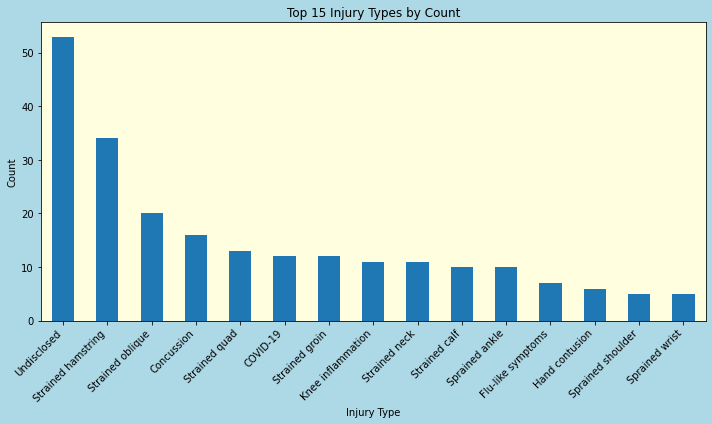

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
injuries_df = pd.read_csv('Injury_Stats/injury_report_22_v2.csv')
stats_df = pd.read_csv('Stats/batting2022.csv')

# Merge the DataFrames on the player name
merged_df = pd.merge(injuries_df, stats_df, on='Name')

# Count the occurrences of each injury type
injury_counts = merged_df['Injury / Surgery'].value_counts()

# Select the top 10 injury types
top_10_injuries = injury_counts.head(15)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color for the figure and axes
fig.patch.set_facecolor('lightblue')  # Background color for the figure
ax.set_facecolor('lightyellow')       # Background color for the axes

# Bar plot for the top 10 injury types by count
top_10_injuries.plot(kind='bar', ax=ax)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Customize the plot
ax.set_title('Top 15 Injury Types by Count')
ax.set_xlabel('Injury Type')
ax.set_ylabel('Count')
plt.tight_layout()


plt.savefig('Visuals/top_15_injury_types_22.png')



# Show the plot
plt.show()

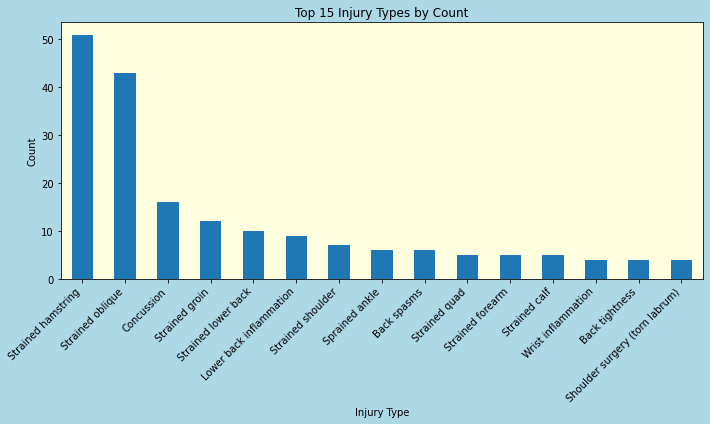

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
injuries_df = pd.read_csv('Injury_Stats/injury_report_23_v2.csv')
stats_df = pd.read_csv('Stats/batting2023.csv')

# Merge the DataFrames on the player name
merged_df = pd.merge(injuries_df, stats_df, on='Name')

# Count the occurrences of each injury type
injury_counts = merged_df['Injury / Surgery'].value_counts()

# Select the top 10 injury types
top_10_injuries = injury_counts.head(15)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color for the figure and axes
fig.patch.set_facecolor('lightblue')  # Background color for the figure
ax.set_facecolor('lightyellow')       # Background color for the axes

# Bar plot for the top 10 injury types by count
top_10_injuries.plot(kind='bar', ax=ax)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Customize the plot
ax.set_title('Top 15 Injury Types by Count')
ax.set_xlabel('Injury Type')
ax.set_ylabel('Count')
plt.tight_layout()


plt.savefig('Visuals/top_15_injury_types_23.png')



# Show the plot
plt.show()

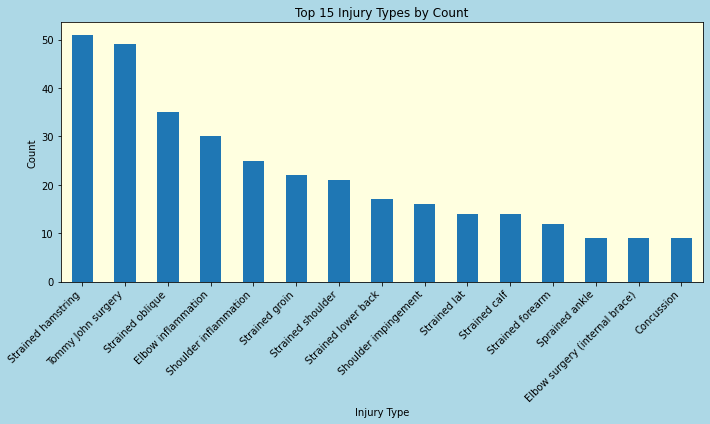

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV files
injuries_df = pd.read_csv('Injury_Stats/injury_report_24_v2.csv')

# Count the occurrences of each injury type
injuries_df = injuries_df['Injury / Surgery'].value_counts()

# Select the top 10 injury types
injuries_df = injuries_df.head(15)

# Plotting the data
fig, ax = plt.subplots(figsize=(10, 6))

# Set the background color for the figure and axes
fig.patch.set_facecolor('lightblue')  # Background color for the figure
ax.set_facecolor('lightyellow')       # Background color for the axes

# Bar plot for the top 10 injury types by count
injuries_df.plot(kind='bar', ax=ax)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right')

# Customize the plot
ax.set_title('Top 15 Injury Types by Count')
ax.set_xlabel('Injury Type')
ax.set_ylabel('Count')
plt.tight_layout()

plt.savefig('Visuals/top_15_injury_types_24.png')

# Show the plot
plt.show()